In [1]:
import scanpy as sc
import scTenifoldXct as st
from scTenifoldXct.visualization import get_Xct_pairs, plot_XNet

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load scRNA-seq data
adata = sc.read_h5ad('data/adata_short_example.h5ad')
adata

AnnData object with n_obs × n_vars = 202 × 3000
    obs: 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'ident'
    layers: 'log1p', 'raw'

In [3]:
# build a scTenifoldXct object, including GRNs
xct = st.scTenifoldXct(data = adata, 
                        source_celltype = 'Inflam. FIB',
                        target_celltype = 'Inflam. DC',
                        obs_label = 'ident',
                        rebuild_GRN = False, # timer
                        GRN_file_dir = 'Net_example',  
                        verbose = True,
                        n_cpus = 8)

(cell, feature): (121, 3000)
(cell, feature): (81, 3000)
selected 107 LR pairs
load GRN Inflam. FIB
load GRN Inflam. DC
build correspondence and initiate a trainer
scTenifoldXct init completed



In [4]:
# # show model architecture
# xct.trainer.arch()

In [5]:
# # load model if trained
# xct.nn_trainer.load_model_states('model_short_example')

In [6]:
# get embeddings
emb = xct.get_embeds(train = True)
emb.shape

training...: 100%|██████████| 1000/1000 [03:08<00:00,  5.31it/s]


computing pair-wise euclidean distances...


(6000, 3)

In [7]:
# # save model
# xct_obj.nn_trainer.save_model_states('model_short_example')

In [8]:
# # show loss
# xct.plot_losses()

In [9]:
# get significant L-R pairs
xct_pairs = xct.null_test()
xct_pairs


Total enriched: 27 / 9000000


,ligand,receptor,dist,correspondence,p_val,enriched_rank
CCL19_CCR7,CCL19,CCR7,0.000128,589.686707,0.001662,1
CXCL14_CCR7,CXCL14,CCR7,0.000128,504.256439,0.001684,2
CCL2_CCR7,CCL2,CCR7,0.000133,334.575897,0.001792,3
CCL19_CXCR4,CCL19,CXCR4,0.000141,412.651093,0.002101,4
CXCL14_CXCR4,CXCL14,CXCR4,0.000141,352.868683,0.002114,5
CCL2_CXCR4,CCL2,CXCR4,0.000146,234.129593,0.002230,6
CXCL12_CCR7,CXCL12,CCR7,0.000169,300.260742,0.002611,7
CXCL12_CXCR4,CXCL12,CXCR4,0.000182,210.116516,0.002801,8
VCAM1_ITGB2,VCAM1,ITGB2,0.000419,65.863914,0.005519,9
CTGF_ITGB2,CTGF,ITGB2,0.000982,28.104105,0.008874,10


In [10]:
# visualize the pairs
targets = get_Xct_pairs(xct_pairs)
targets[:5]

(['CCL19', 'CCR7'],
 ['CXCL14', 'CCR7'],
 ['CCL2', 'CCR7'],
 ['CCL19', 'CXCR4'],
 ['CXCL14', 'CXCR4'])

load GRN None
undirected graph constructed: 
# of nodes: 21, # of edges: 20

load GRN None
undirected graph constructed: 
# of nodes: 21, # of edges: 20

graphs merged: 
# of nodes: 42, # of edges: 40

edge from CCL19 to CCR7 added


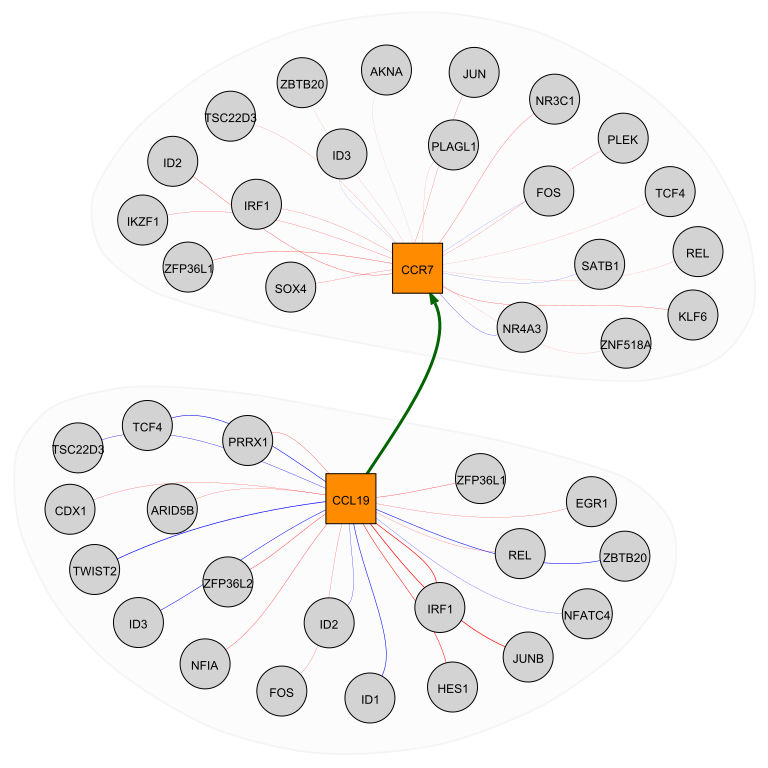

In [11]:
i = 0
s = xct.plot_pcNet_graph(view='sender', gene_names=[targets[i][0]],
                             top_edges=20, show = False, verbose = True)
t = xct.plot_pcNet_graph(view='receiver', gene_names=[targets[i][1]], 
                             top_edges=20, show = False, verbose = True)

plot_XNet(s, t, gene_pairs = [targets[i]], df_enriched = xct_pairs, show = True, verbose = True)